<a href="https://colab.research.google.com/github/jfelipeo/Proyecto_Analitica_II_Equipo-5/blob/main/Pretratamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='970f5a'><b>Importacion librerías


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# <font color='970f5a'><b>Importacion datos

In [2]:
datos = "https://raw.githubusercontent.com/jfelipeo/Proyecto_Analitica_II_Equipo-5/main/ecommerce-data.csv"
df = pd.read_csv(datos)
df.head()

Reviews  Reviews_Duration  Informational  Informational_Duration  \
0        0               0.0              0                     0.0   
1        0               0.0              0                     0.0   
2        0               0.0              0                     0.0   
3        0               0.0              0                     0.0   
4        0               0.0              0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   PageValues  SpecialDay Month  OperatingSystems  Browser  Region  \
0         0.0         0.0   Feb                 1        1       1   
1         0.0         0.0   Feb                 2        2       1   
2         0.0         0.0   Feb                 4        1       9   
3         0.0         0.0   Feb                 3        2       2   
4         0.0         0.0   Feb                 3        3       1   

   TrafficType        VisitorType  Weekend  Purchase  
0            1  Returning_Visitor    False     False  
1            2  Returning_Visitor    False     False  
2            3  Returning_Visitor    False     False  
3            4  Returning_Visitor    False     False  
4            4  Returning_Visitor     True     False

#<font color='970f5a'><b>Análisis exploratorio inicial


Se empieza con realizando una visualización de las primeras entradas en los datos

In [3]:
df.head()

Reviews  Reviews_Duration  Informational  Informational_Duration  \
0        0               0.0              0                     0.0   
1        0               0.0              0                     0.0   
2        0               0.0              0                     0.0   
3        0               0.0              0                     0.0   
4        0               0.0              0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   PageValues  SpecialDay Month  OperatingSystems  Browser  Region  \
0         0.0         0.0   Feb                 1        1       1   
1         0.0         0.0   Feb                 2        2       1   
2         0.0         0.0   Feb                 4        1       9   
3         0.0         0.0   Feb                 3        2       2   
4         0.0         0.0   Feb                 3        3       1   

   TrafficType        VisitorType  Weekend  Purchase  
0            1  Returning_Visitor    False     False  
1            2  Returning_Visitor    False     False  
2            3  Returning_Visitor    False     False  
3            4  Returning_Visitor    False     False  
4            4  Returning_Visitor     True     False

Tamaño de la base de datos

In [4]:
df.shape

(12330, 18)

## <font color='fd1a3e'><b>Variables

Información del tipo de datos que contiene cada variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

En principio, se tienen 2 variables booleanas, 2 categórica y 14 numéricas

In [6]:
df.describe(include='all')

Reviews  Reviews_Duration  Informational  Informational_Duration  \
count   12330.000000      12330.000000   12330.000000            12330.000000   
unique           NaN               NaN            NaN                     NaN   
top              NaN               NaN            NaN                     NaN   
freq             NaN               NaN            NaN                     NaN   
mean        2.315166         80.818611       0.503569               34.472398   
std         3.321784        176.779107       1.270156              140.749294   
min         0.000000          0.000000       0.000000                0.000000   
25%         0.000000          0.000000       0.000000                0.000000   
50%         1.000000          7.500000       0.000000                0.000000   
75%         4.000000         93.256250       0.000000                0.000000   
max        27.000000       3398.750000      24.000000             2549.375000   

        ProductRelated  ProductRelated_Duration   BounceRates     ExitRates  \
count     12330.000000             12330.000000  12330.000000  12330.000000   
unique             NaN                      NaN           NaN           NaN   
top                NaN                      NaN           NaN           NaN   
freq               NaN                      NaN           NaN           NaN   
mean         31.731468              1194.746220      0.022191      0.043073   
std          44.475503              1913.669288      0.048488      0.048597   
min           0.000000                 0.000000      0.000000      0.000000   
25%           7.000000               184.137500      0.000000      0.014286   
50%          18.000000               598.936905      0.003112      0.025156   
75%          38.000000              1464.157214      0.016813      0.050000   
max         705.000000             63973.522230      0.200000      0.200000   

          PageValues    SpecialDay  Month  OperatingSystems       Browser  \
count   12330.000000  12330.000000  12330      12330.000000  12330.000000   
unique           NaN           NaN     10               NaN           NaN   
top              NaN           NaN    May               NaN           NaN   
freq             NaN           NaN   3364               NaN           NaN   
mean        5.889258      0.061427    NaN          2.124006      2.357097   
std        18.568437      0.198917    NaN          0.911325      1.717277   
min         0.000000      0.000000    NaN          1.000000      1.000000   
25%         0.000000      0.000000    NaN          2.000000      2.000000   
50%         0.000000      0.000000    NaN          2.000000      2.000000   
75%         0.000000      0.000000    NaN          3.000000      2.000000   
max       361.763742      1.000000    NaN          8.000000     13.000000   

              Region   TrafficType        VisitorType Weekend Purchase  
count   12330.000000  12330.000000              12330   12330    12330  
unique           NaN           NaN                  3       2        2  
top              NaN           NaN  Returning_Visitor   False    False  
freq             NaN           NaN              10551    9462    10422  
mean        3.147364      4.069586                NaN     NaN      NaN  
std         2.401591      4.025169                NaN     NaN      NaN  
min         1.000000      1.000000                NaN     NaN      NaN  
25%         1.000000      2.000000                NaN     NaN      NaN  
50%         3.000000      2.000000                NaN     NaN      NaN  
75%         4.000000      4.000000                NaN     NaN      NaN  
max         9.000000     20.000000                NaN     NaN      NaN

### <font color='f5a865'><b>Análisis univariado

#### <font color='b47ce5'><b>Variables numéricas

In [7]:
num = ['Reviews','Reviews_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',
       'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'OperatingSystems',	'Browser',	'Region', 'TrafficType']

df[num].describe().T

count         mean          std  min         25%  \
Reviews                  12330.0     2.315166     3.321784  0.0    0.000000   
Reviews_Duration         12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Reviews                    1.000000     4.000000     27.000000  
Reviews_Duration           7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000



Reviews:[

Información de la variable:
count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Reviews, dtype: float64

Valores unicos:
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Reviews, dtype: int64

Histograma:


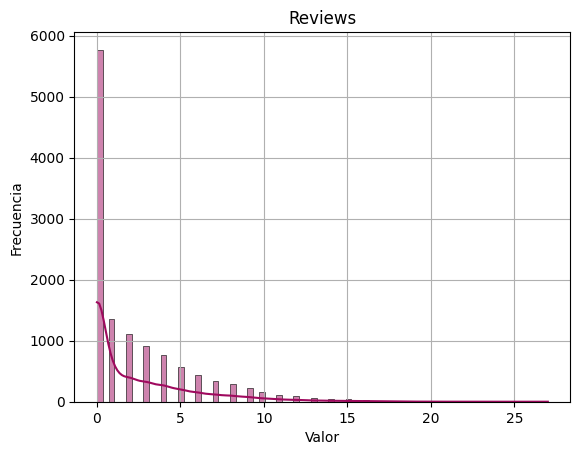



Reviews_Duration:[

Información de la variable:
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Reviews_Duration, dtype: float64

Valores unicos:
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Reviews_Duration, Length: 3335, dtype: int64

Histograma:


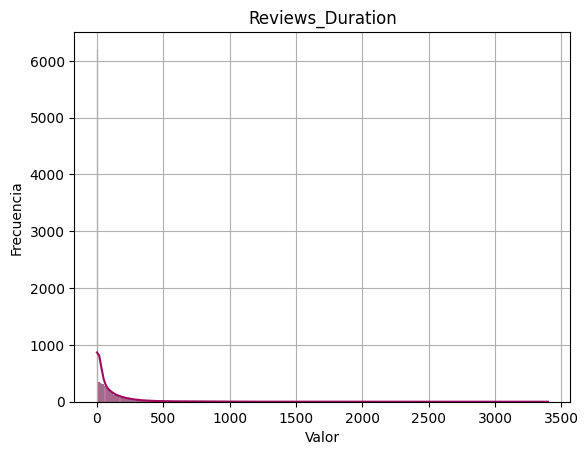



Informational:[

Información de la variable:
count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

Valores unicos:
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

Histograma:


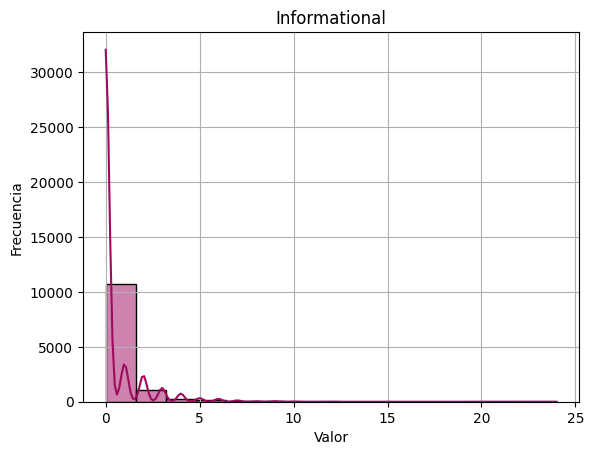



Informational_Duration:[

Información de la variable:
count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

Valores unicos:
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

Histograma:


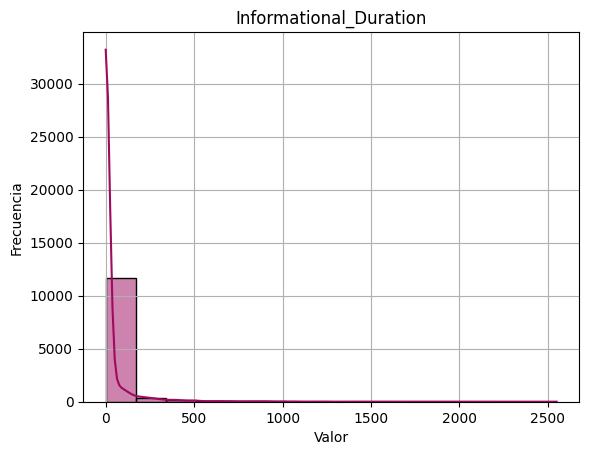



ProductRelated:[

Información de la variable:
count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

Valores unicos:
1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

Histograma:


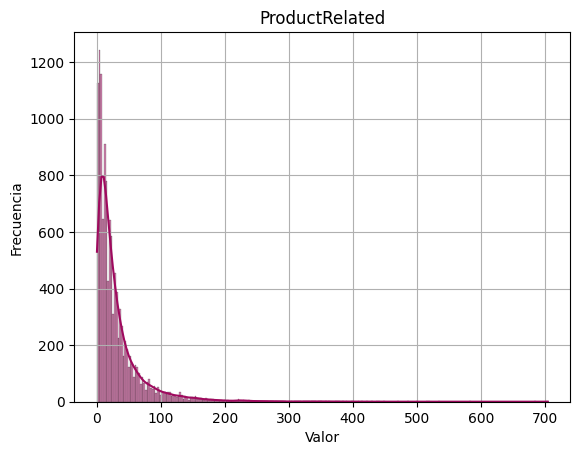



ProductRelated_Duration:[

Información de la variable:
count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

Valores unicos:
0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64

Histograma:


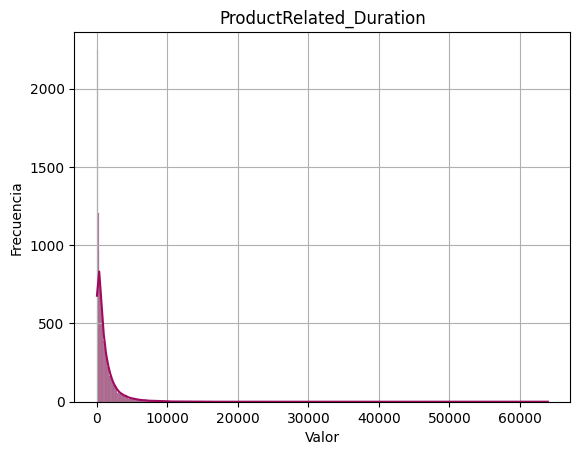



BounceRates:[

Información de la variable:
count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

Valores unicos:
0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64

Histograma:


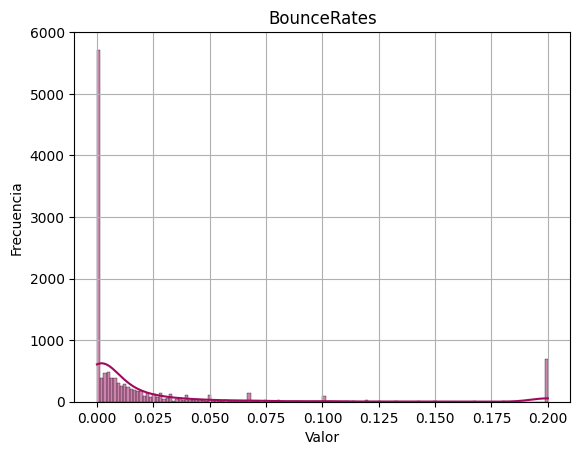



ExitRates:[

Información de la variable:
count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

Valores unicos:
0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64

Histograma:


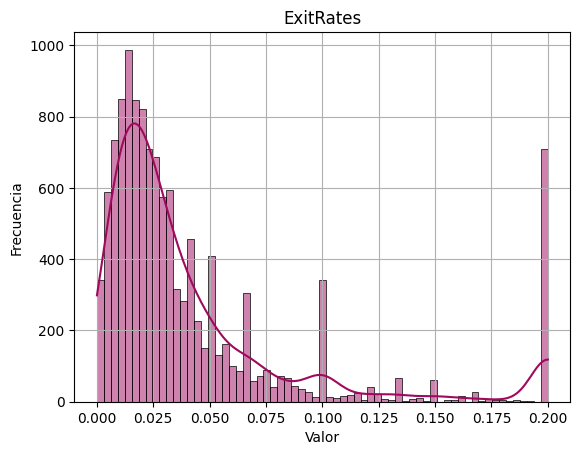



PageValues:[

Información de la variable:
count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

Valores unicos:
0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

Histograma:


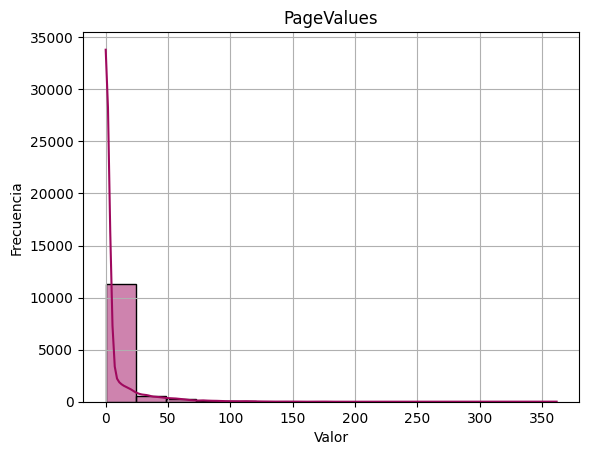



SpecialDay:[

Información de la variable:
count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

Valores unicos:
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Histograma:


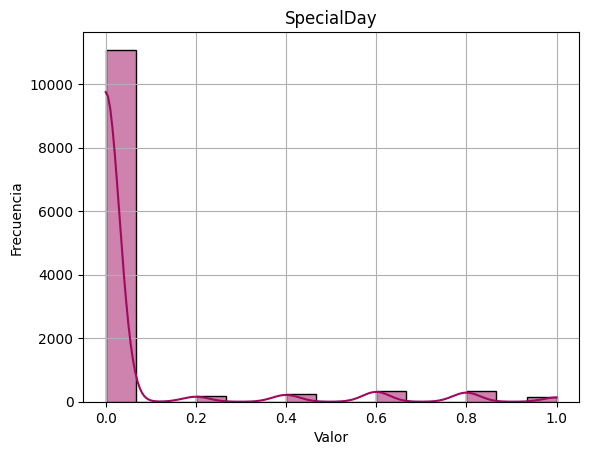



OperatingSystems:[

Información de la variable:
count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64

Valores unicos:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Histograma:


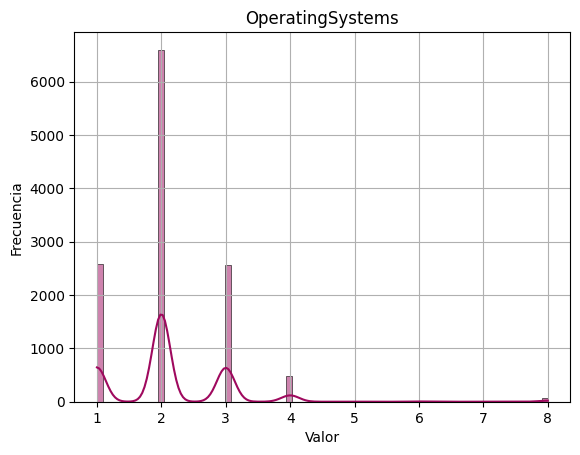



Browser:[

Información de la variable:
count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64

Valores unicos:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Histograma:


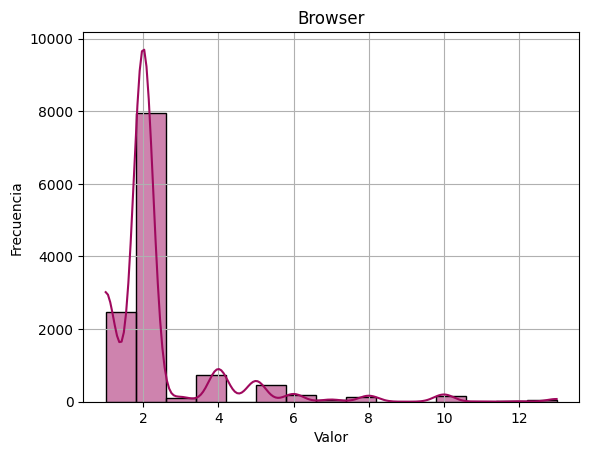



Region:[

Información de la variable:
count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64

Valores unicos:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Histograma:


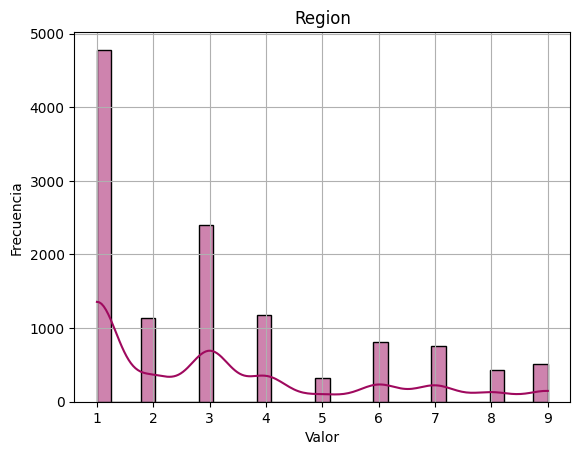



TrafficType:[

Información de la variable:
count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64

Valores unicos:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Histograma:


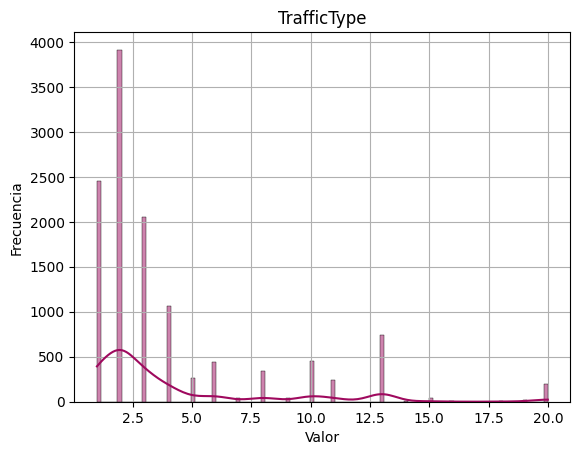

In [8]:
def numericas(df, num):
    for n in num:

        descripcion = df[n].describe()
        conteo = df[n].value_counts()
        print(f"\n\n\033[1m{n}:\033[\n\nInformación de la variable:\n{descripcion}\n\nValores unicos:\n{conteo}\n\nHistograma:")

        sns.histplot(df[n], kde=True, color='#9f095e')
        plt.title(n)
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

numericas(df, num)


#### <font color='b47ce5'><b>Variables categóricas

In [9]:
cat = ['Month',	'VisitorType', 'Weekend',	'Purchase']

df[cat].describe().T

count unique                top   freq
Month        12330     10                May   3364
VisitorType  12330      3  Returning_Visitor  10551
Weekend      12330      2              False   9462
Purchase     12330      2              False  10422



Month:[

Información de la variable:
count     12330
unique       10
top         May
freq       3364
Name: Month, dtype: object

Valores unicos:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Porcenjas de los valores:
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64

Histograma:


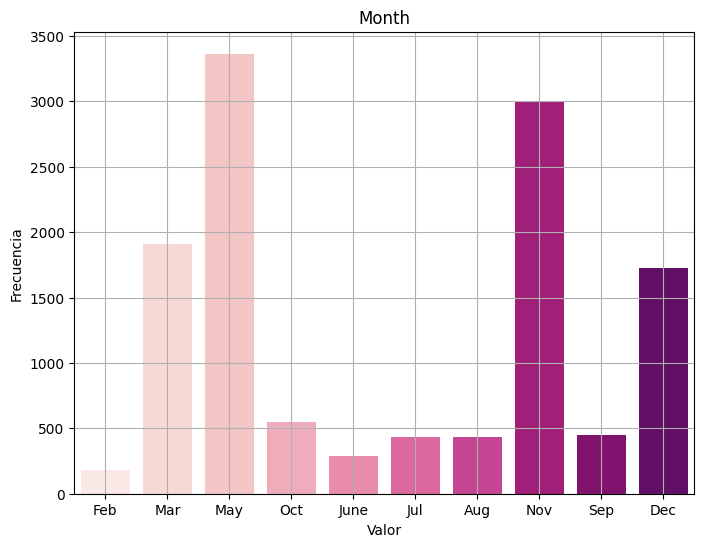



VisitorType:[

Información de la variable:
count                 12330
unique                    3
top       Returning_Visitor
freq                  10551
Name: VisitorType, dtype: object

Valores unicos:
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Porcenjas de los valores:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64

Histograma:


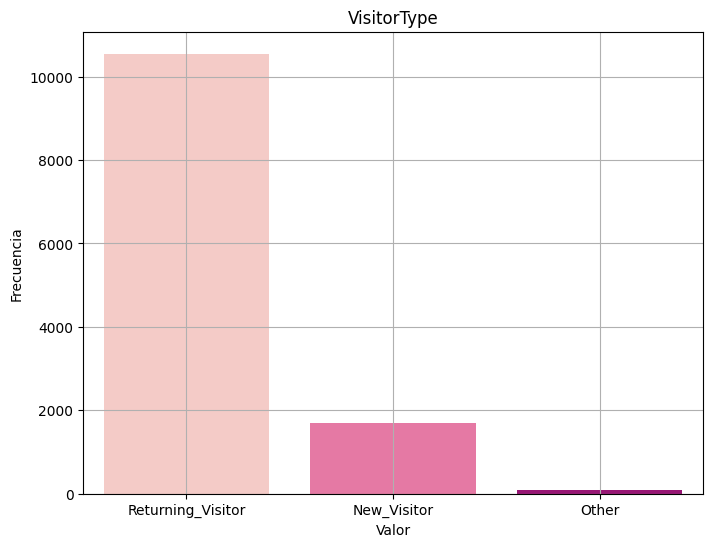



Weekend:[

Información de la variable:
count     12330
unique        2
top       False
freq       9462
Name: Weekend, dtype: object

Valores unicos:
False    9462
True     2868
Name: Weekend, dtype: int64

Porcenjas de los valores:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64

Histograma:


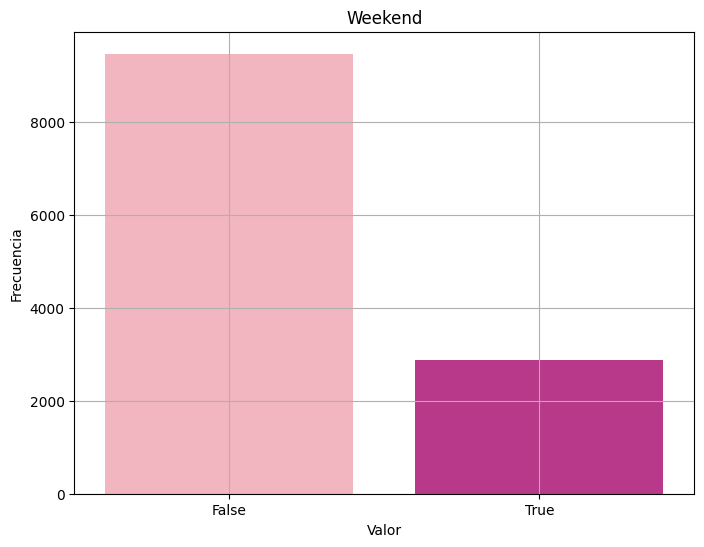



Purchase:[

Información de la variable:
count     12330
unique        2
top       False
freq      10422
Name: Purchase, dtype: object

Valores unicos:
False    10422
True      1908
Name: Purchase, dtype: int64

Porcenjas de los valores:
False    84.525547
True     15.474453
Name: Purchase, dtype: float64

Histograma:


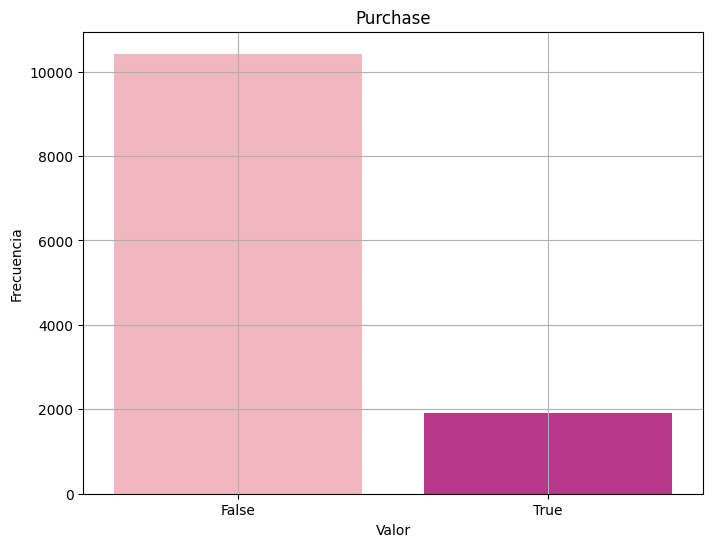

In [10]:
def categoricas(df, cat):
    for c in cat:

        descripcion = df[c].describe()
        conteo = df[c].value_counts()
        porcentaje = df[c].value_counts(normalize=True) * 100
        print(f"\n\n\033[1m{c}:\033[\n\nInformación de la variable:\n{descripcion}\n\nValores unicos:\n{conteo}\n\nPorcenjas de los valores:\n{porcentaje}\n\nHistograma:")

        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=c, palette='RdPu', hue=c, legend=False)
        plt.title(c)
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        # plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

categoricas(df, cat)

#### <font color='b47ce5'><b>Variable objetivo</b>

<font color='fce3e1'>***Purchase:***</font> Indica si el usuario realizó una compra o no.

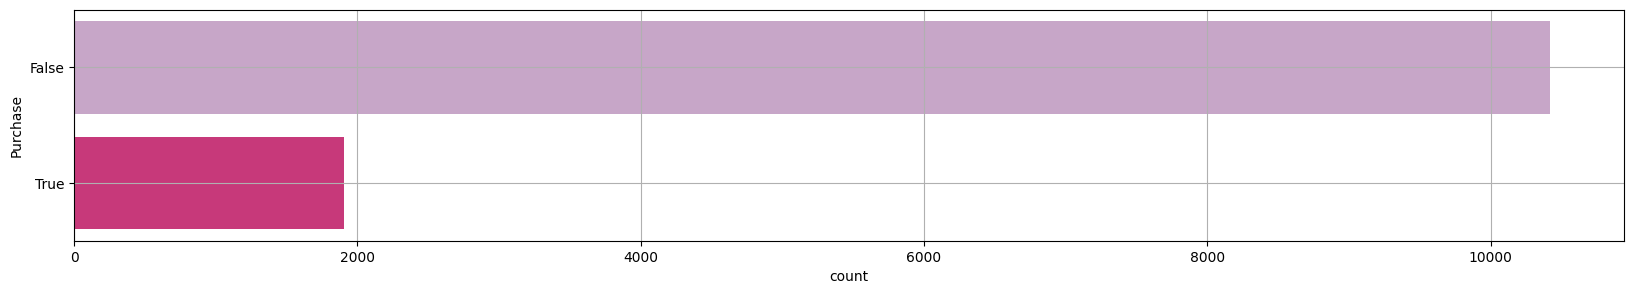

In [11]:
plt.figure(figsize=(20,3))
fig = sns.countplot(y=df['Purchase'], data=df, palette="PuRd", hue='Purchase',legend=False)
plt.grid(True)
plt.show()

Lo más destacable de esta variable es la evidente diferencia entre la cantidad que sí realizaron compra y los que no. Es decir, estamos frente a un problema de clases desbalanceadas.

#### <font color='b47ce5'><b>Redefinición de las variables</b></font>
<font color='fce3e1'>***Numéricas:***</font>

> **'OperatingSystems', 'Browser', 'Región', 'TrafficType'**

1. Estas variables parecen ser numéricas, pero, al analizar sus valores únicos, se descubre que en realidad contienen un conjunto limitado de valores que se repiten. Por lo tanto, se decidió que estas variables serán tratadas como variables categóricas en lugar de numéricas.
2. Según lo descrito en el diccionario, son características categóricas.
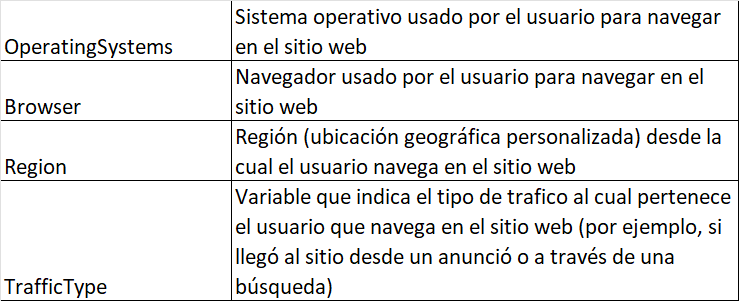

<font color='fce3e1'>***Categóricas:***</font>

> **'Month'**

- Se cambia *June* por *Jun* para que seguir con el formato de los otros meses.


In [12]:
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('int64').astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [13]:
#Numérica
df[num] = df[num].astype('float')

##Numérica a categórica
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('int64').astype('object')

#Categoría Mes
df['Month'] = df['Month'].replace('June', 'Jun')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  float64
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

De esta manera, ahora son 10 variables numéricas, 6 categóricas y 2 booleanas

In [14]:
num = ['Reviews','Reviews_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',
       'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay']

cat = ['Month','OperatingSystems',	'Browser',	'Region', 'TrafficType',	'VisitorType', 'Weekend',	'Purchase']

### <font color='f5a865'><b>Análisis bivariado

#### <font color='b47ce5'><b> Categóricas Vs 'Purchase'

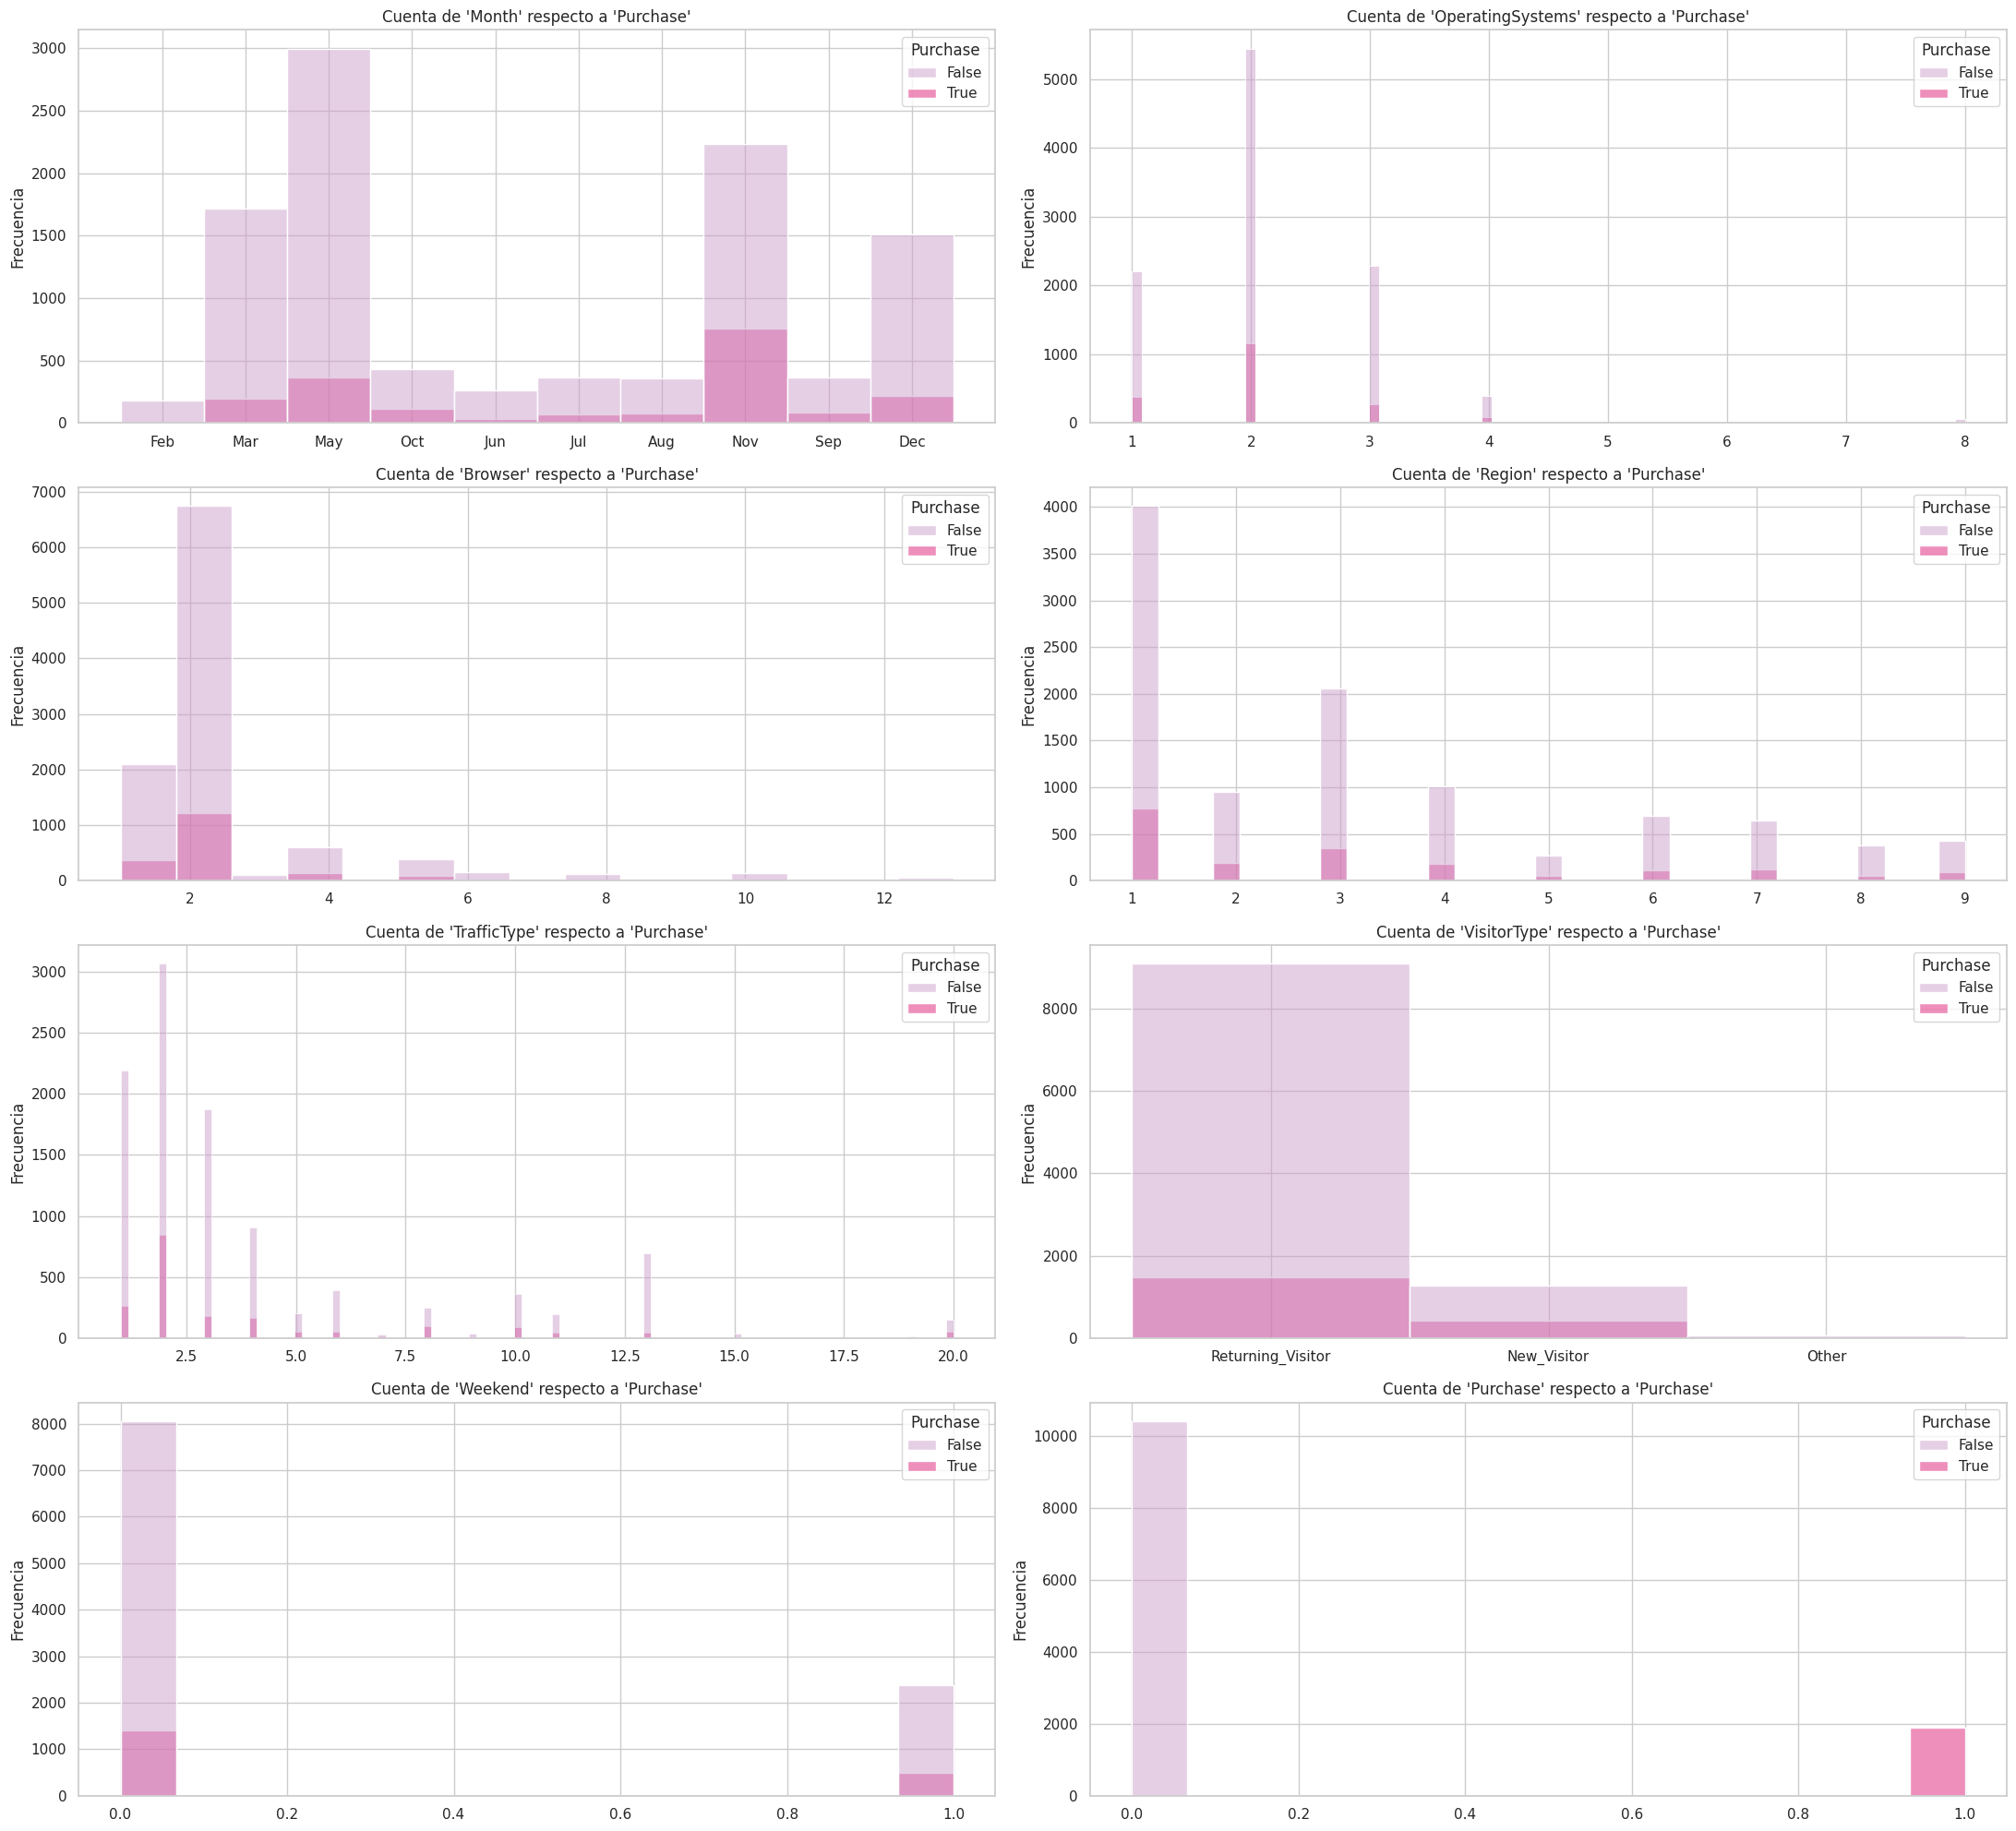

In [15]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(22, 20))

for col, ax in zip(df[cat].columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Purchase", ax=ax, palette="PuRd")
    ax.set_title(f"Cuenta de '{col}' respecto a 'Purchase'")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### <font color='b47ce5'><b> Numéricas Vs 'Purchase'

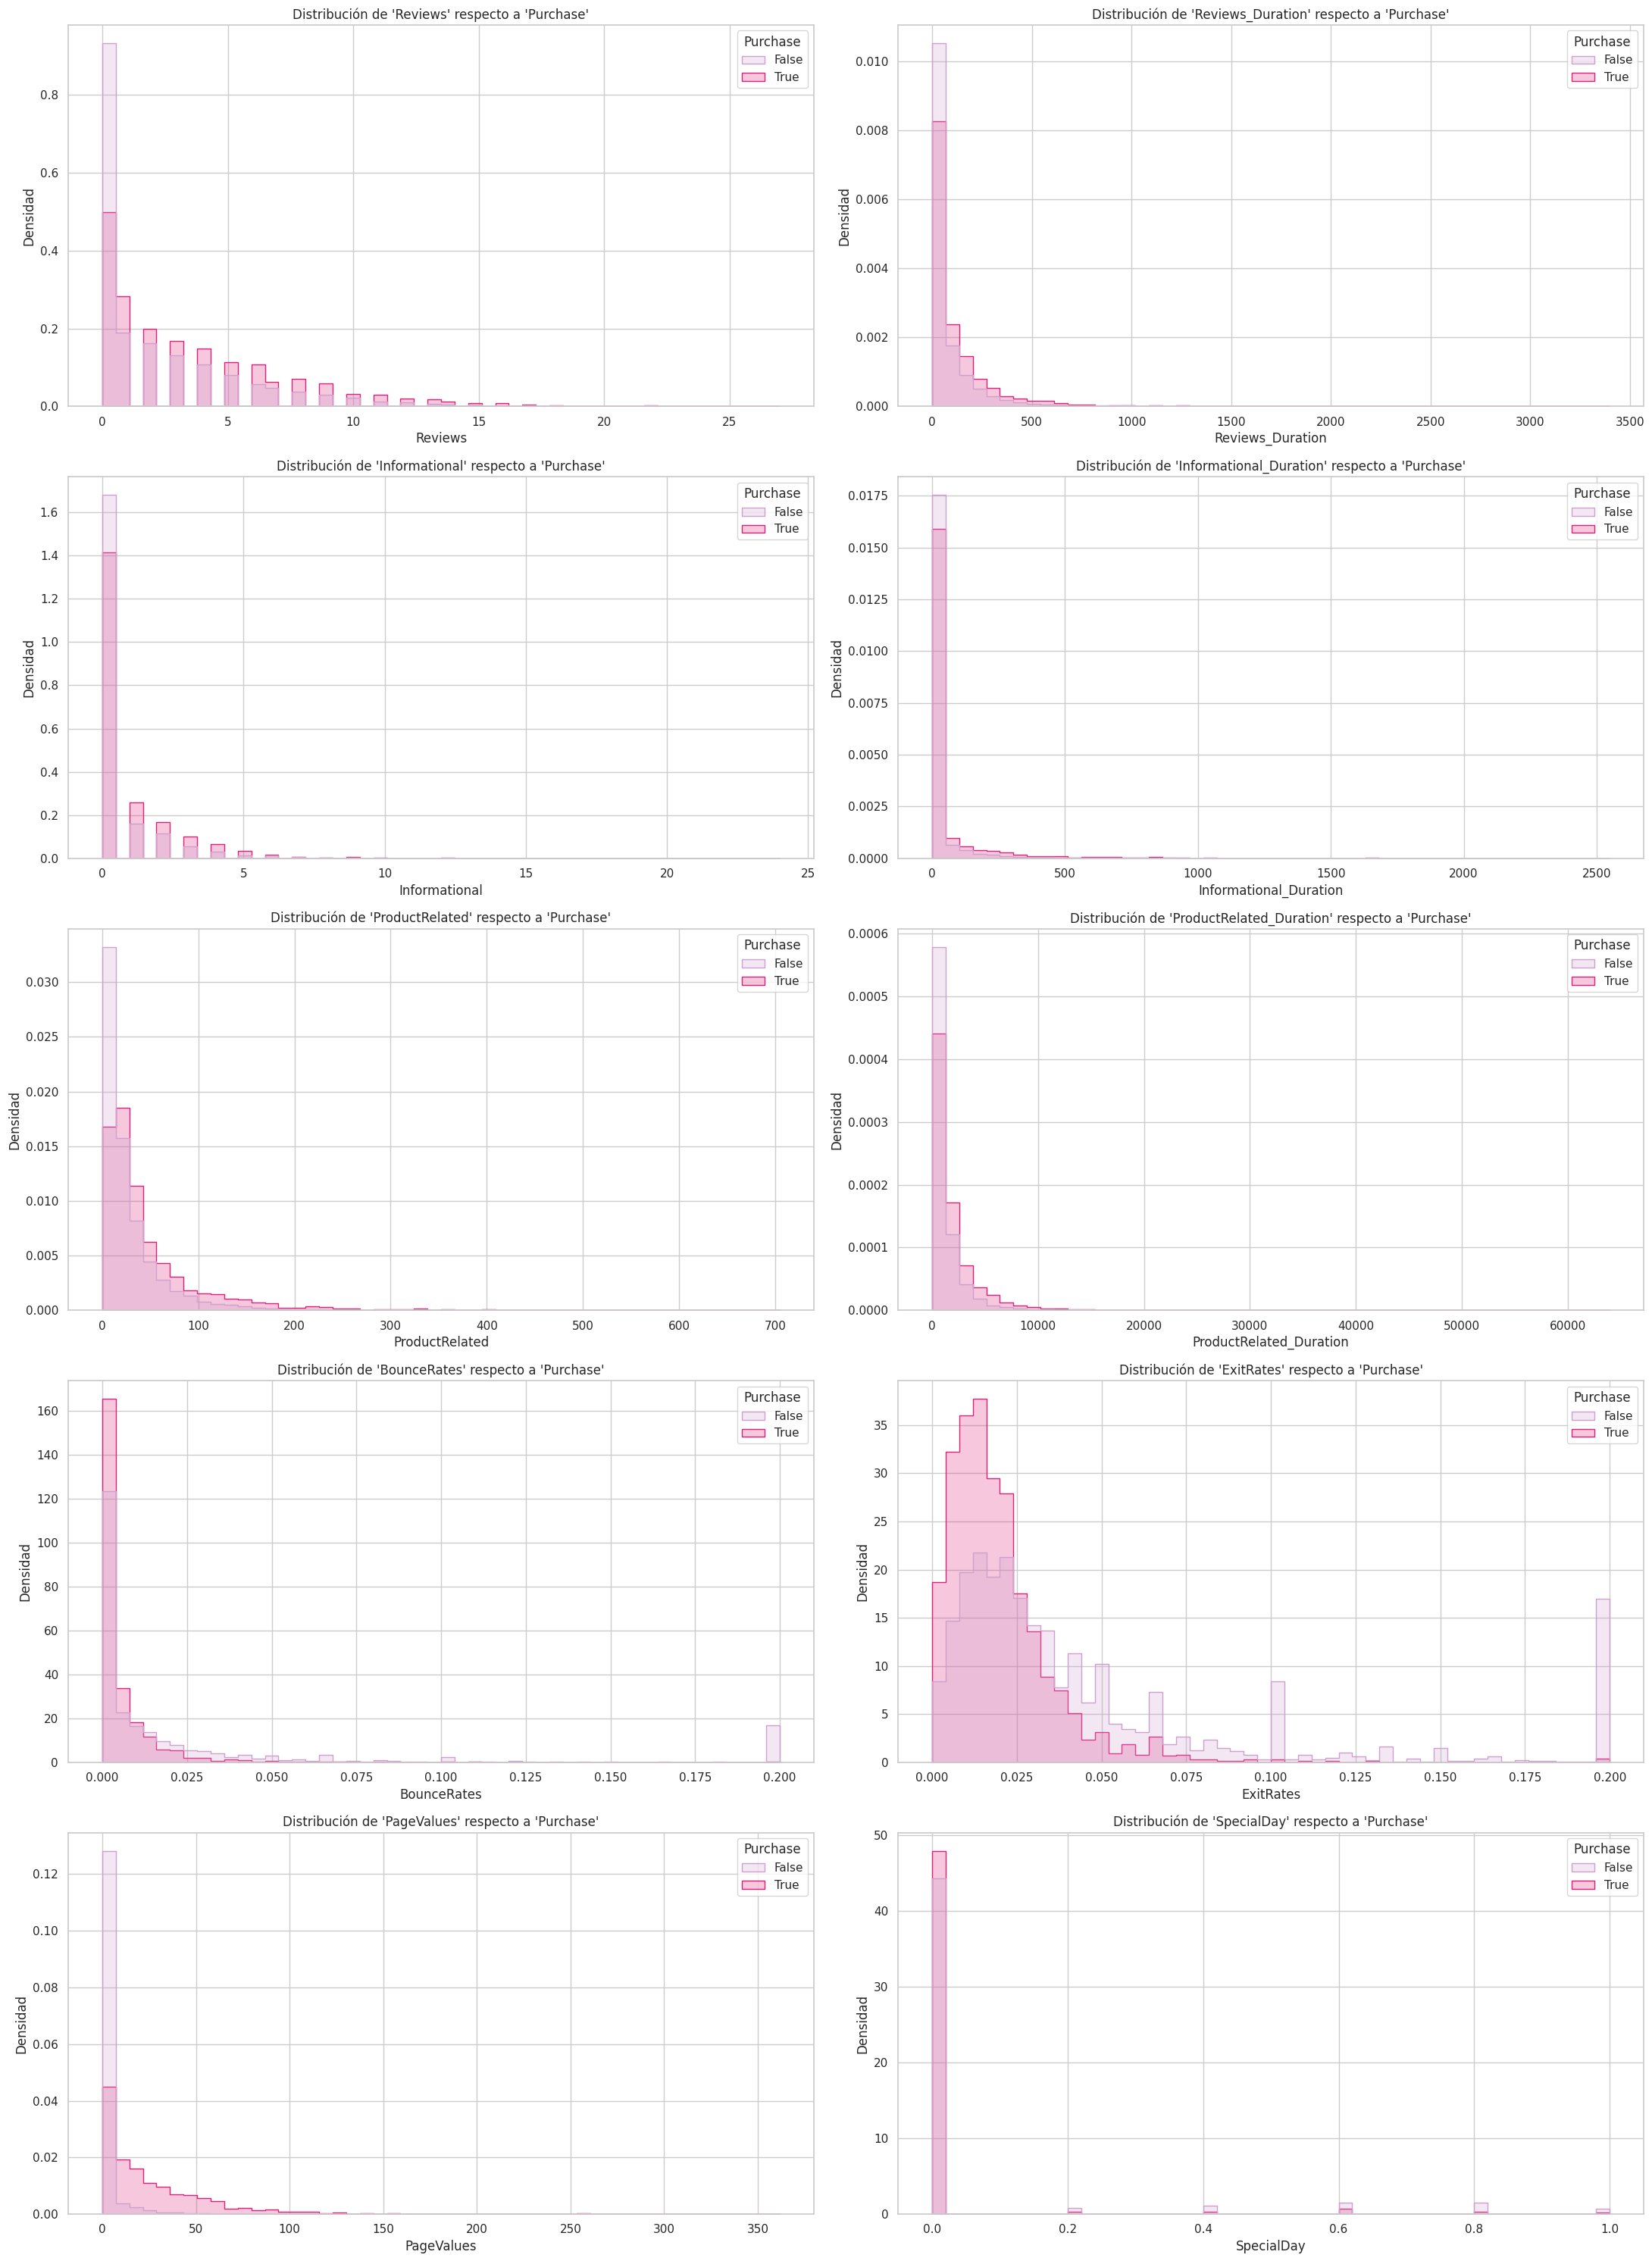

In [16]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(5, 2, figsize=(22, 30))

for col, ax in zip(df[num], axes.flatten()):
    sns.histplot(data=df, x=col, hue="Purchase", element="step", stat="density", common_norm=False, bins=50, ax=ax, palette='PuRd')
    ax.set_title(f"Distribución de '{col}' respecto a 'Purchase'")
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.show()

<font color='b47ce5'><b> Todas las variables Vs 'Purchase'

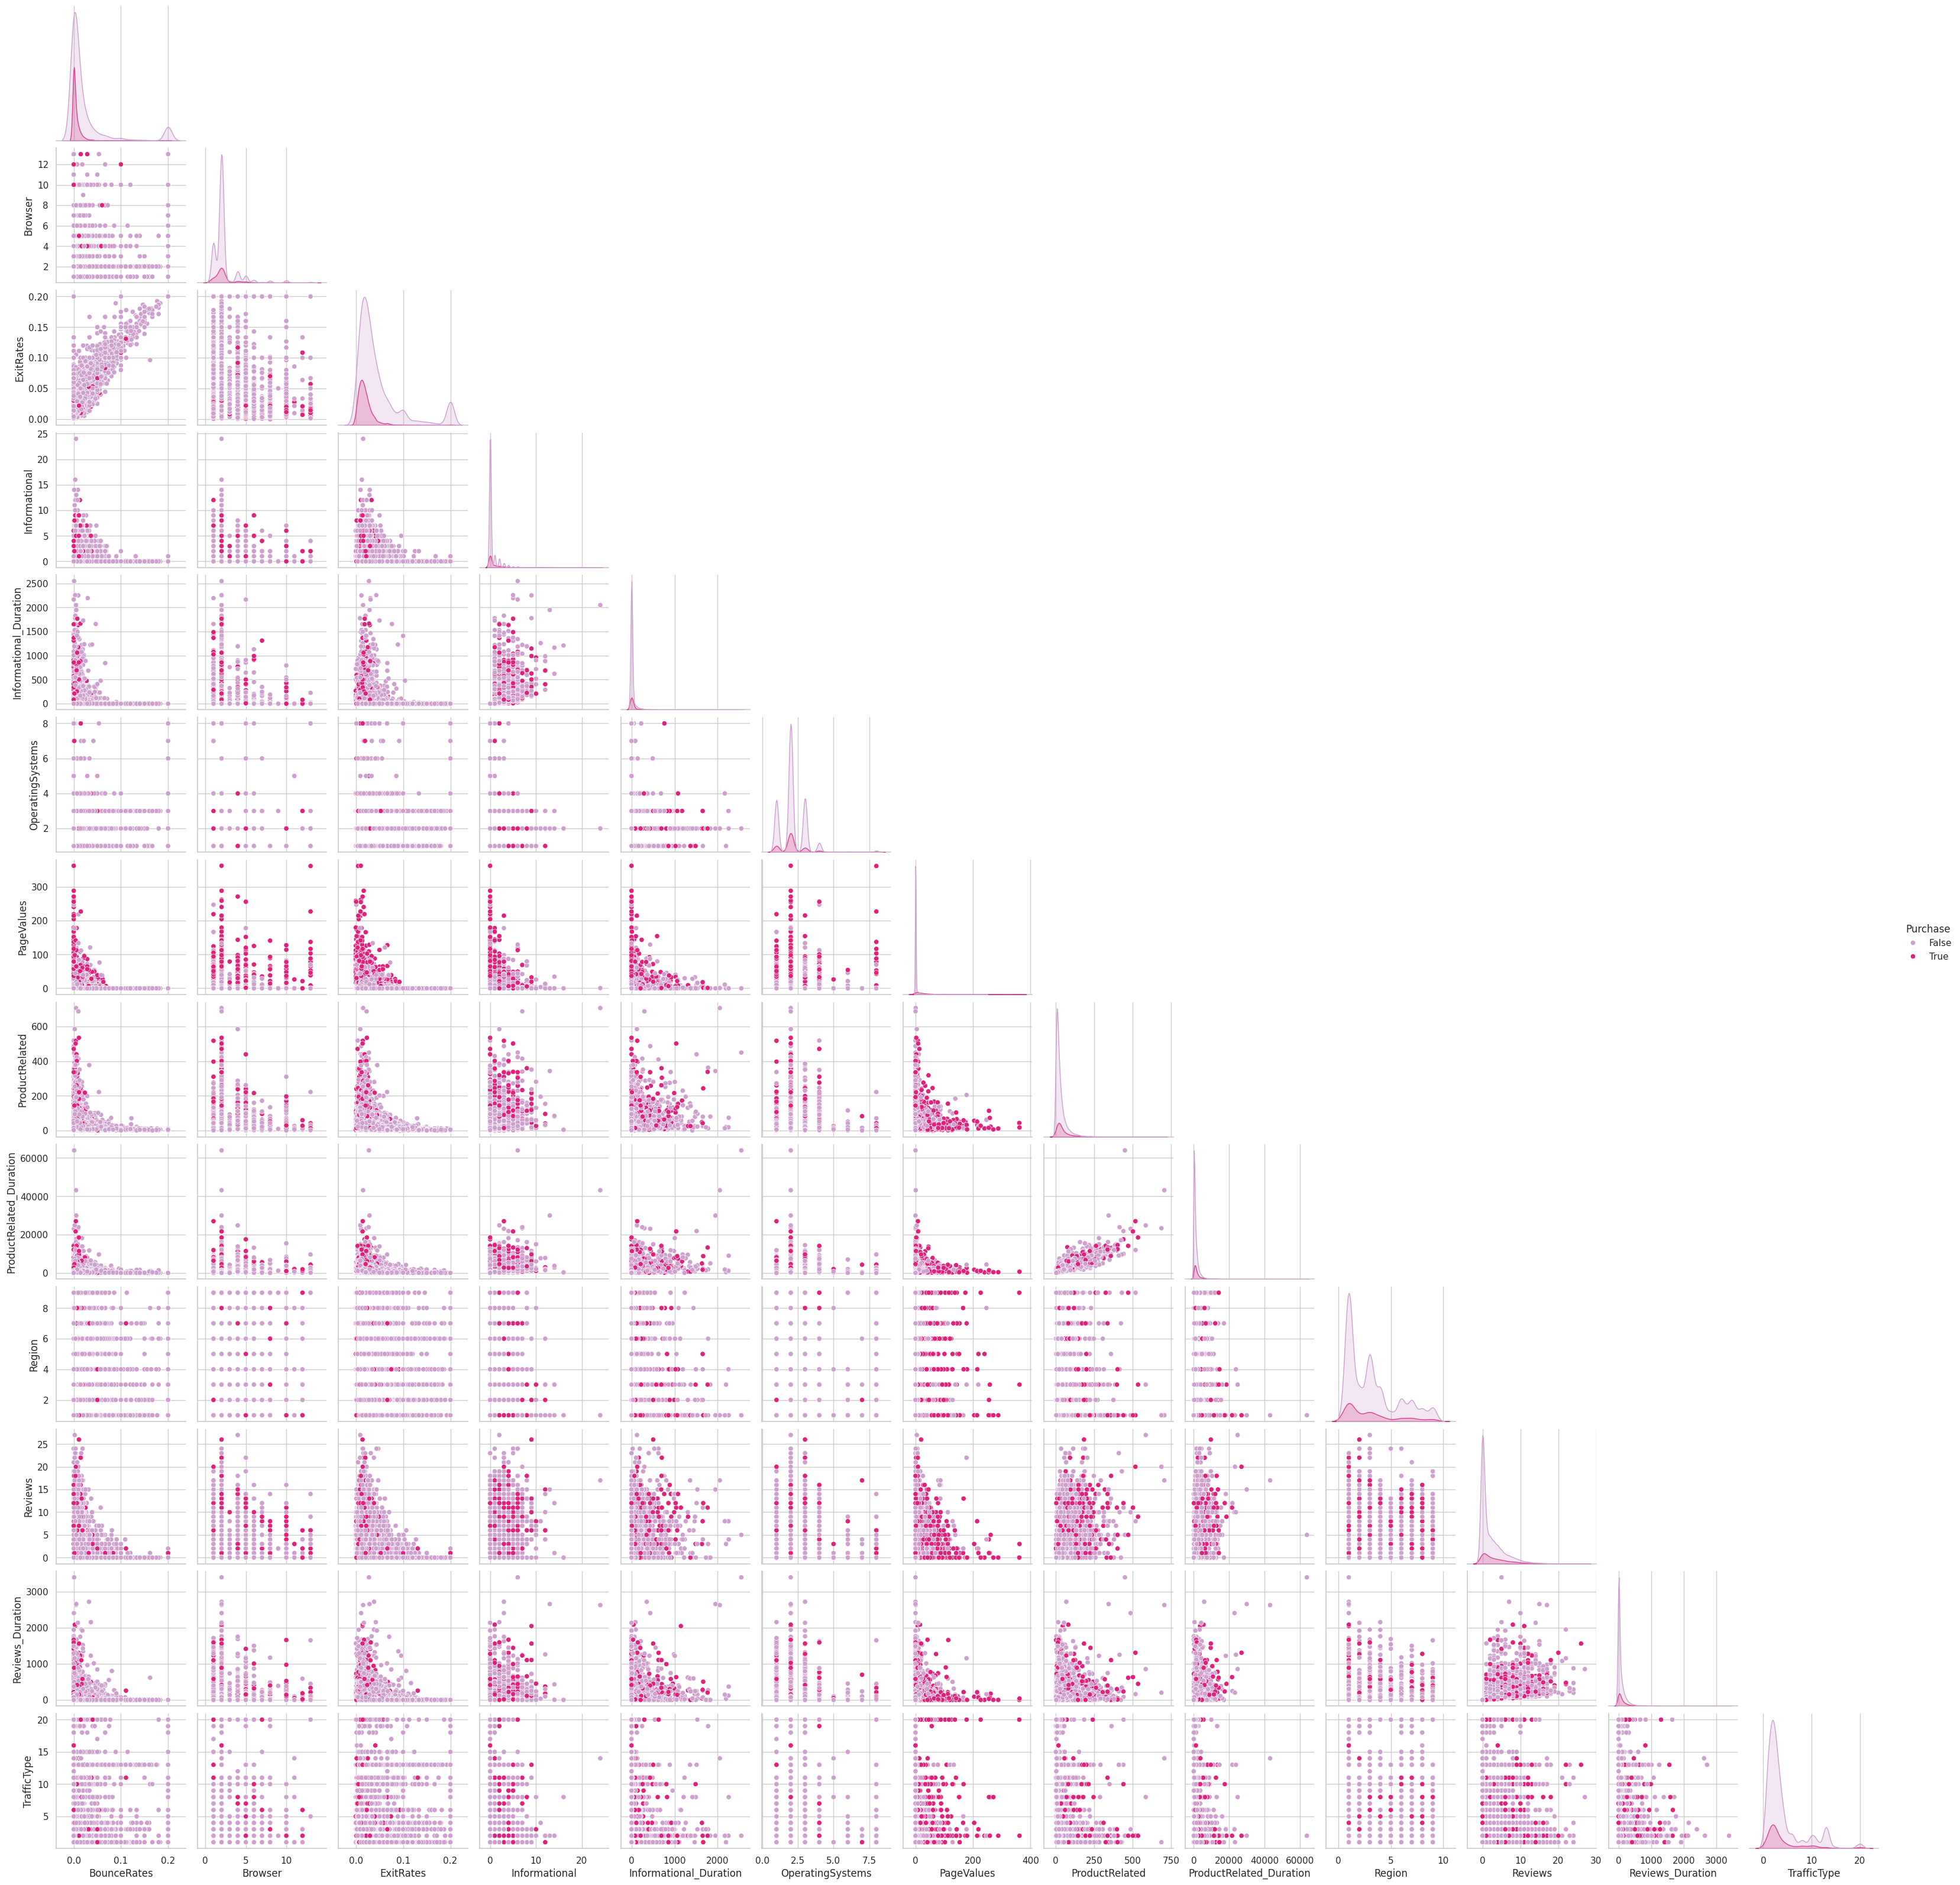

In [17]:
#Pairplot
sns.pairplot(df[df.select_dtypes(include=['number', 'object', 'bool']).columns.difference(['SpecialDay', 'Weekend'])], hue = 'Purchase', corner=True, palette='PuRd')

#### <font color='b47ce5'><b>Correlación Independientes


<ipython-input-18-ad03897fcbcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, cmap='PuRd', fmt=".2f", linewidths=.5)


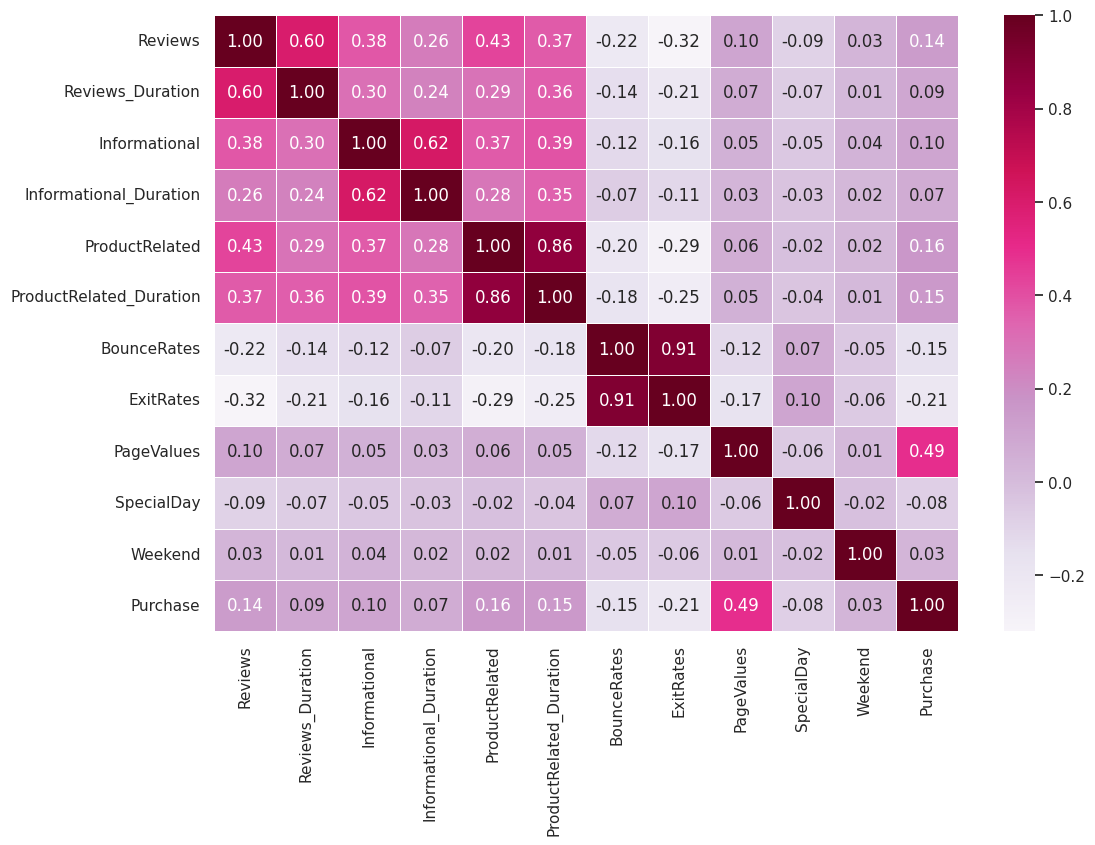

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='PuRd', fmt=".2f", linewidths=.5)
plt.show()

# <font color='970f5a'><b>Limpieza y transformación

## <font color='fd1a3e'><b>Datos Faltantes

**Identificación de datos faltantes**

In [19]:
df.isnull().sum().sum()

0

La base de datos no contiene datos faltantes

## <font color='fd1a3e'><b>Duplicados

### <font color='f5a865'><b>Identificación

In [20]:
df.duplicated().sum()

125

Se encontraron 125 filas duplicadas, las cuales se eliminarán


### <font color='f5a865'><b>Tratamiento

In [21]:
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum()

0

## <font color='fd1a3e'><b>Datos Atípicos

### <font color='f5a865'><b>Identificacion

#### <font color='b47ce5'><b>Gráficamente

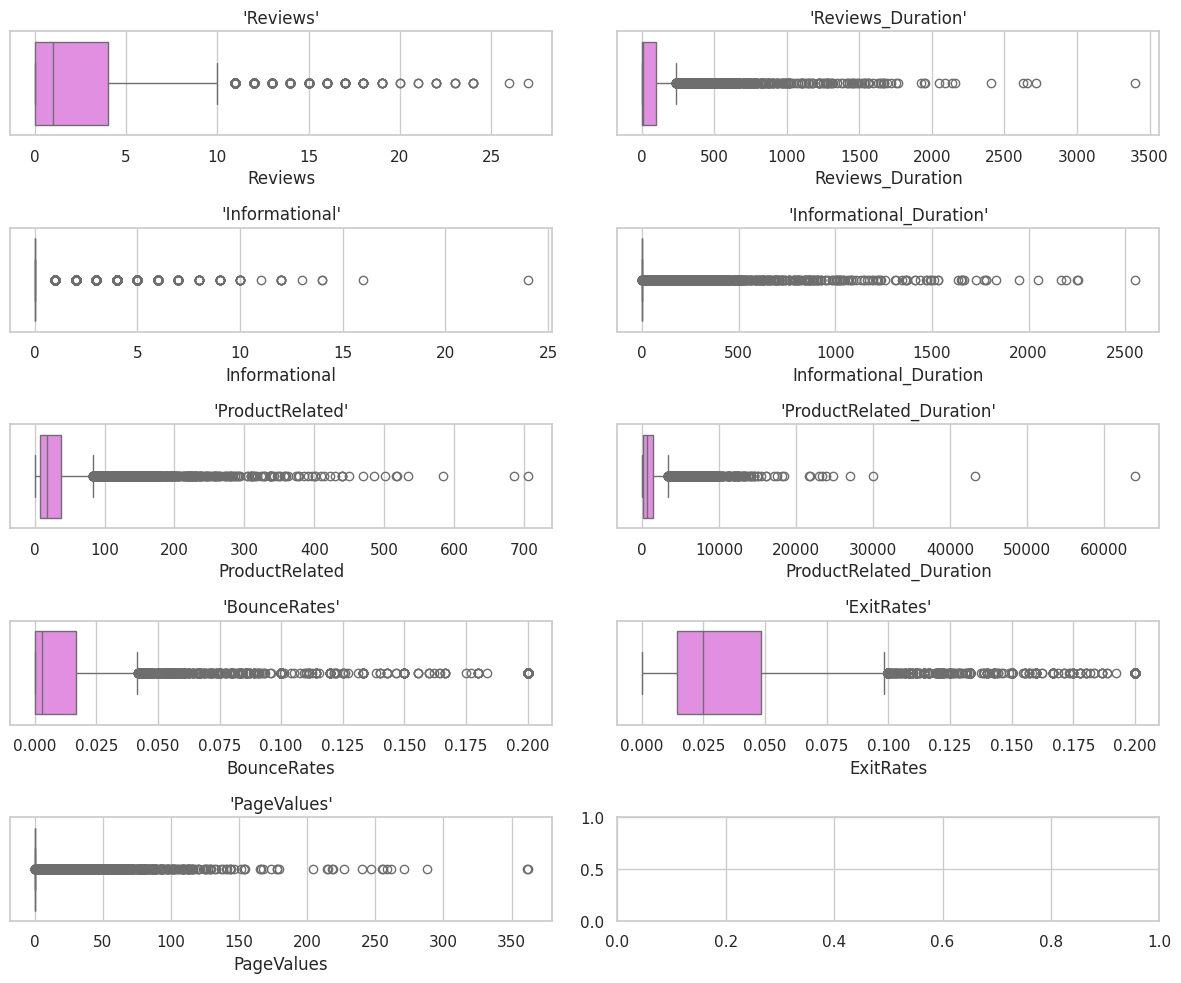

In [22]:
variables_numericas = ['Reviews', 'Reviews_Duration', 'Informational',
                       'Informational_Duration', 'ProductRelated',
                       'ProductRelated_Duration', 'BounceRates',
                       'ExitRates', 'PageValues']

num_variables = len(variables_numericas)
num_filas = (num_variables + 1) // 2
num_columnas = 2

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_numericas):
    sns.boxplot(x=df[variable], ax=axes[i], color='Violet')
    axes[i].set_title(f"'{variable}'")
    #axes[i].set_xlabel()

plt.tight_layout()
plt.show()

#### <font color='b47ce5'><b>Rango Intercuartílico

In [23]:
umbral = 1.5
info = []

for variable in df[variables_numericas]:
    Q1 = df.describe().at['25%', variable]
    Q3 = df.describe().at['75%', variable]
    RIC = Q3 - Q1

    Max = Q3 + (umbral * RIC)
    Min = Q1 - (umbral * RIC)

    outliers = df[(df[variable] < Min) | (df[variable] > Max)]

    info.append([variable, Min, Q1, Q3, Max, RIC, len(outliers)])

IQR = pd.DataFrame(info, columns=['Variable', 'Min', 'Q1', 'Q3', 'Max', 'RIC', 'Cantidad de Outliers'])
IQR['% de Outliers'] = (IQR['Cantidad de Outliers'] / len(df)) * 100
IQR

Variable          Min          Q1           Q3          Max  \
0                  Reviews    -6.000000    0.000000     4.000000    10.000000   
1         Reviews_Duration  -142.050000    0.000000    94.700000   236.750000   
2            Informational     0.000000    0.000000     0.000000     0.000000   
3   Informational_Duration     0.000000    0.000000     0.000000     0.000000   
4           ProductRelated   -37.000000    8.000000    38.000000    83.000000   
5  ProductRelated_Duration -1733.232143  193.000000  1477.154762  3403.386905   
6              BounceRates    -0.025000    0.000000     0.016667     0.041667   
7                ExitRates    -0.037217    0.014231     0.048529     0.099977   
8               PageValues     0.000000    0.000000     0.000000     0.000000   

           RIC  Cantidad de Outliers  % de Outliers  
0     4.000000                   404       3.310119  
1    94.700000                  1149       9.414175  
2     0.000000                  2631      21.556739  
3     0.000000                  2405      19.705039  
4    30.000000                  1007       8.250717  
5  1284.154762                   951       7.791889  
6     0.016667                  1428      11.700123  
7     0.034298                  1325      10.856206  
8     0.000000                  2730      22.367882

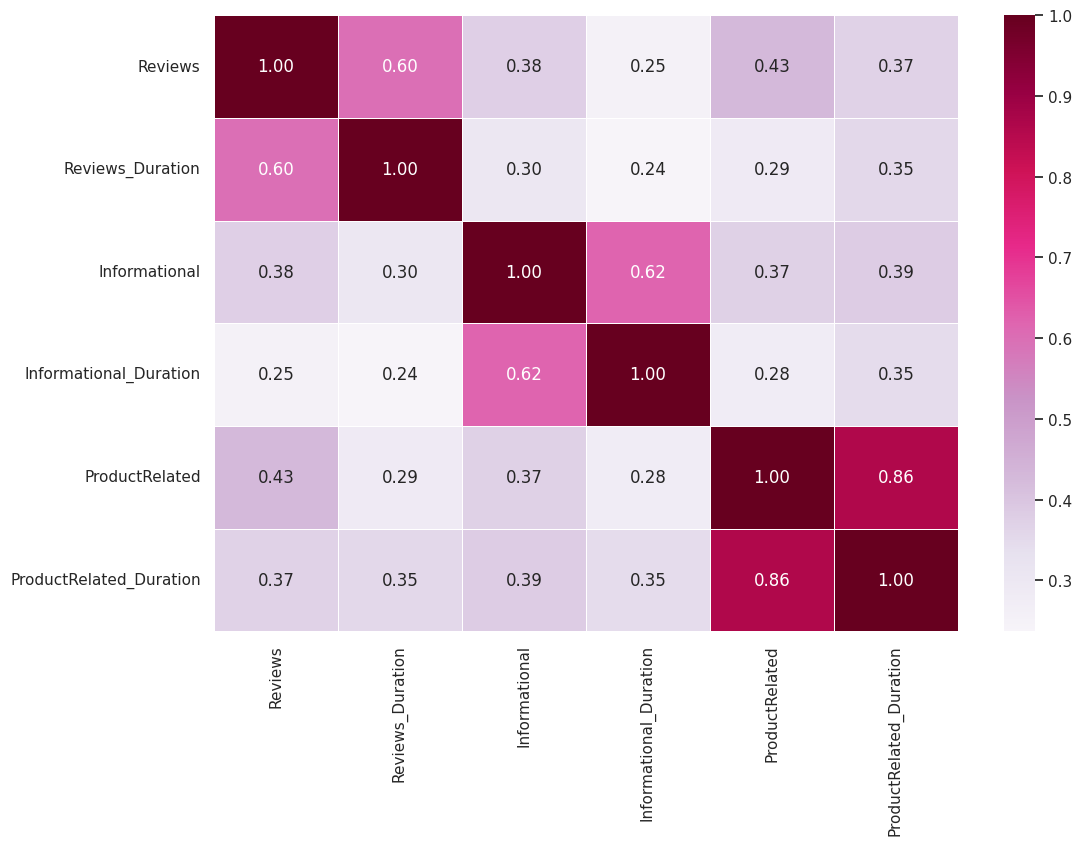

In [24]:
df_c_o= df[['Reviews', 'Reviews_Duration', 'Informational','Informational_Duration', 'ProductRelated','ProductRelated_Duration']]
plt.figure(figsize=(12, 8))
sns.heatmap(df_c_o.corr(), annot=True, cmap='PuRd', fmt=".2f", linewidths=.5)
plt.show()

Tras notar la gran cantidad de outliers y la alta correlación entre las variables *'Reviews', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues'* y la variable que corresponde a sus respectivas duraciones, se decide no tener en cuenta las variables que respecten al tiempo: *..._Duration* en el tratamiento de datos atipicos

Revisión de los datos atípicos extremos

In [25]:
# Diccionario de valores límite para cada columna
valores_limite = {'Reviews': 25, 'Informational': 15, 'ProductRelated': 450,
                  'BounceRates':0.2, 'ExitRates': 0.2, 'PageValues': 150}

# Conteo de datos
conteos = {}

# Iteraracion y busqueda
for columna, limite in valores_limite.items():
    # Filtrar los datos de la columna que sean mayores o iguales al valor límite
    datos_filtrados = df[df[columna] >= limite][columna]
    # Contar el número de filas encontradas
    conteo = datos_filtrados.count()
    # Almacenar el conteo en el diccionario
    conteos[columna] = conteo

# Mostrar los conteos para cada columna
for columna, conteo in conteos.items():
    print("Cantidad de datos mayores o iguales a", valores_limite[columna], "en la columna "+"\033[1m"+columna+"\033[" + ":", conteo)

Cantidad de datos mayores o iguales a 25 en la columna Reviews[: 2
Cantidad de datos mayores o iguales a 15 en la columna Informational[: 2
Cantidad de datos mayores o iguales a 450 en la columna ProductRelated[: 9
Cantidad de datos mayores o iguales a 0.2 en la columna BounceRates[: 575
Cantidad de datos mayores o iguales a 0.2 en la columna ExitRates[: 585
Cantidad de datos mayores o iguales a 150 en la columna PageValues[: 27


### <font color='f5a865'><b>Tratamiento

In [26]:
df_outliers = df.copy()
columnas_numericas = df_outliers.select_dtypes(include=np.number)
medianas = columnas_numericas.median()

# Iterar sobre las columnas y valores límite
for columna, limite in valores_limite.items():
    # Filtrar los datos de la columna que sean mayores o iguales al valor límite
    indices_filtrados = df_outliers[columna] >= limite
    # Reemplazar los valores que cumplen la condición por la mediana de esa columna
    df_outliers.loc[indices_filtrados, columna] = medianas[columna]

df_outliers

Reviews  Reviews_Duration  Informational  Informational_Duration  \
0          0.0               0.0            0.0                     0.0   
1          0.0               0.0            0.0                     0.0   
2          0.0               0.0            0.0                     0.0   
3          0.0               0.0            0.0                     0.0   
4          0.0               0.0            0.0                     0.0   
...        ...               ...            ...                     ...   
12325      3.0             145.0            0.0                     0.0   
12326      0.0               0.0            0.0                     0.0   
12327      0.0               0.0            0.0                     0.0   
12328      4.0              75.0            0.0                     0.0   
12329      0.0               0.0            0.0                     0.0   

       ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0                 1.0                 0.000000     0.002899   0.025000   
1                 2.0                64.000000     0.000000   0.100000   
2                 1.0                 0.000000     0.002899   0.025000   
3                 2.0                 2.666667     0.050000   0.140000   
4                10.0               627.500000     0.020000   0.050000   
...               ...                      ...          ...        ...   
12325            53.0              1783.791667     0.007143   0.029031   
12326             5.0               465.750000     0.000000   0.021333   
12327             6.0               184.250000     0.083333   0.086667   
12328            15.0               346.000000     0.000000   0.021053   
12329             3.0                21.250000     0.000000   0.066667   

       PageValues  SpecialDay Month OperatingSystems Browser Region  \
0        0.000000         0.0   Feb                1       1      1   
1        0.000000         0.0   Feb                2       2      1   
2        0.000000         0.0   Feb                4       1      9   
3        0.000000         0.0   Feb                3       2      2   
4        0.000000         0.0   Feb                3       3      1   
...           ...         ...   ...              ...     ...    ...   
12325   12.241717         0.0   Dec                4       6      1   
12326    0.000000         0.0   Nov                3       2      1   
12327    0.000000         0.0   Nov                3       2      1   
12328    0.000000         0.0   Nov                2       2      3   
12329    0.000000         0.0   Nov                3       2      1   

      TrafficType        VisitorType  Weekend  Purchase  
0               1  Returning_Visitor    False     False  
1               2  Returning_Visitor    False     False  
2               3  Returning_Visitor    False     False  
3               4  Returning_Visitor    False     False  
4               4  Returning_Visitor     True     False  
...           ...                ...      ...       ...  
12325           1  Returning_Visitor     True     False  
12326           8  Returning_Visitor     True     False  
12327          13  Returning_Visitor     True     False  
12328          11  Returning_Visitor    False     False  
12329           2        New_Visitor     True     False  

[12205 rows x 18 columns]

Tras aplicar el tratamiento, se queda con un total de *12205* entradas

#### <font color='b47ce5'><b>Efecto

In [27]:
conteos = {}

for columna, limite in valores_limite.items():
    datos_filtrados = df_outliers[df_outliers[columna] >= limite][columna]
    conteo = datos_filtrados.count()
    conteos[columna] = conteo

for columna, conteo in conteos.items():
    print("Cantidad de datos mayores o iguales a", valores_limite[columna], "en la columna "+"\033[1m"+columna+"\033[" + ":", conteo)

Cantidad de datos mayores o iguales a 25 en la columna Reviews[: 0
Cantidad de datos mayores o iguales a 15 en la columna Informational[: 0
Cantidad de datos mayores o iguales a 450 en la columna ProductRelated[: 0
Cantidad de datos mayores o iguales a 0.2 en la columna BounceRates[: 0
Cantidad de datos mayores o iguales a 0.2 en la columna ExitRates[: 0
Cantidad de datos mayores o iguales a 150 en la columna PageValues[: 0


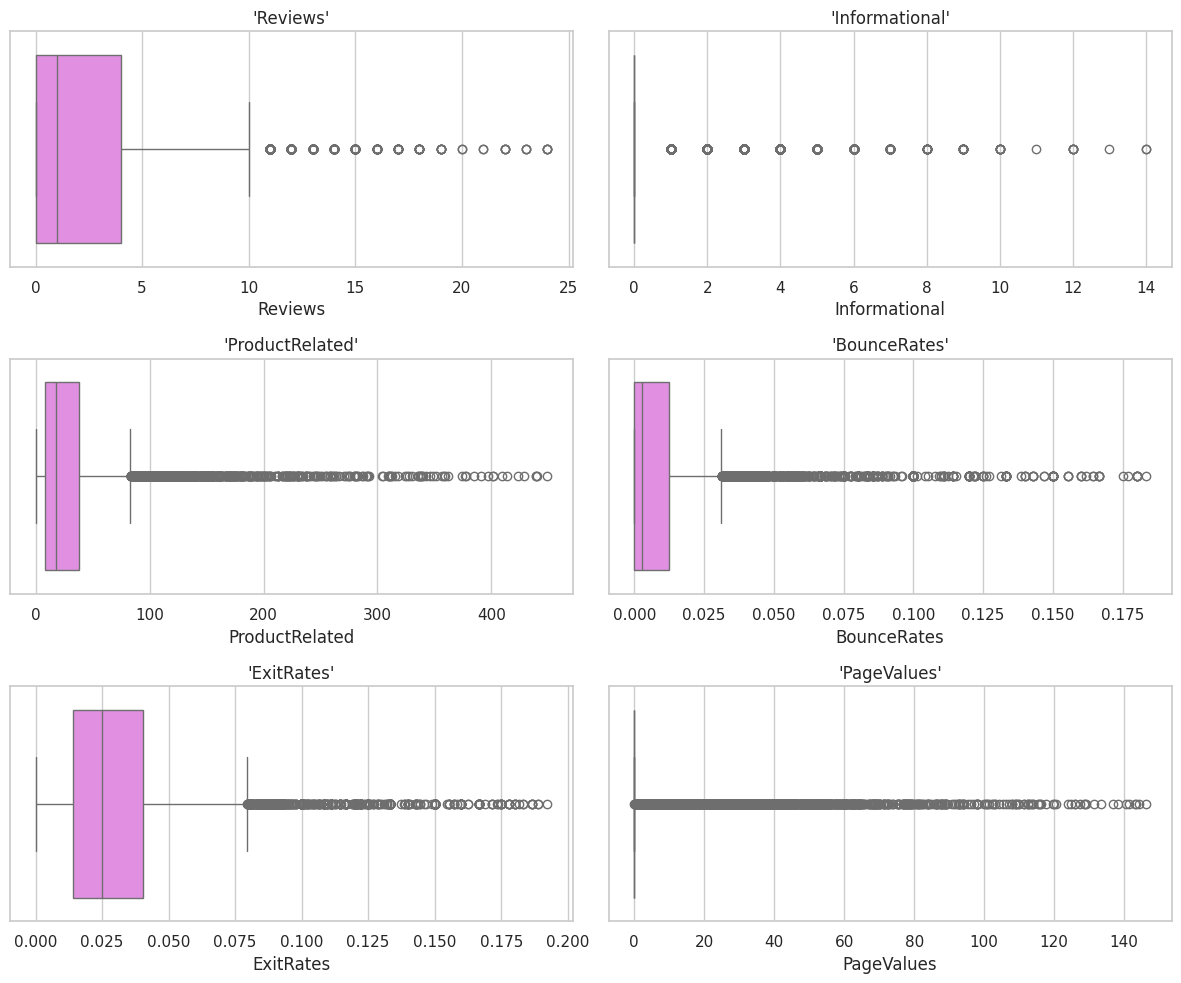

In [28]:
variables_numericas = ['Reviews','Informational','ProductRelated',
                       'BounceRates','ExitRates', 'PageValues']

num_variables = len(variables_numericas)
num_filas = (num_variables + 1) // 2
num_columnas = 2

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_numericas):
    sns.boxplot(x=df_outliers[variable], ax=axes[i], color='Violet')
    axes[i].set_title(f"'{variable}'")
    #axes[i].set_xlabel()

plt.tight_layout()
plt.show()

#<font color='970f5a'><b>DataFrame final 1

In [43]:
df_outliers.to_csv('df_pretratamiento.csv', index=False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12205 non-null  float64
 1   Reviews_Duration         12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType           